In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
import wrangle
warnings.filterwarnings('ignore')

In [4]:
df = wrangle.wrangle_zillow()

Acquiring data from SQL database


In [5]:
train, validate, test = wrangle.split_zillow_data(df)

### Baseline

In [12]:
train_model = train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

In [13]:
baseline = train_model.taxvaluedollarcnt.mean()
baseline

295842.2744215938

In [15]:
train_model['baseline'] = train_model.taxvaluedollarcnt.mean()
train_model.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline
442,1792,585000,295842.274422
45878,1712,82288,295842.274422
45857,1422,79348,295842.274422
11954,1044,202526,295842.274422
28541,1464,459000,295842.274422


Text(0.5, 1.0, 'Baseline Model')

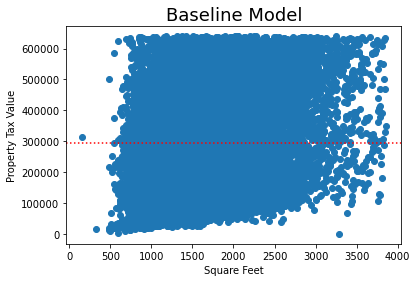

In [21]:
#plot data with baseline: 

plt.scatter(train_model.calculatedfinishedsquarefeet, train_model.taxvaluedollarcnt)
plt.axhline(train_model.taxvaluedollarcnt.mean(), ls = ':', c='red')
plt.xlabel('Square Feet')
plt.ylabel('Property Tax Value')
plt.title('Baseline Model', fontdict = {'fontsize' : 18})

### Fit a regression model using ordinary least squares method

In [22]:
#create the model object 
lm = LinearRegression(normalize=True)

#fit the model to training data 
lm.fit(train_model[['calculatedfinishedsquarefeet']], train_model.taxvaluedollarcnt)

#make prediction 
train_model['yhat'] = lm.predict(train_model[['calculatedfinishedsquarefeet']])

train_model

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat
442,1792,585000,295842.274422,310504.427329
45878,1712,82288,295842.274422,303793.837463
45857,1422,79348,295842.274422,279467.949196
11954,1044,202526,295842.274422,247760.412076
28541,1464,459000,295842.274422,282991.008876
...,...,...,...,...
3191,1645,430277,295842.274422,298173.718449
4497,1056,155000,295842.274422,248767.000556
2109,1620,92191,295842.274422,296076.659116
47016,2936,342000,295842.274422,406465.862422


Text(0.5, 1.0, 'OLS linear model')

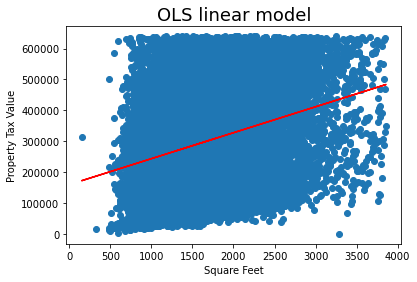

In [24]:
#Visualize the line of best fit from OLS linear model 

plt.scatter(train_model.calculatedfinishedsquarefeet, train_model.taxvaluedollarcnt)
plt.plot(train_model.calculatedfinishedsquarefeet, train_model.yhat, c='red')
plt.xlabel('Square Feet')
plt.ylabel('Property Tax Value')
plt.title('OLS linear model', fontdict = {'fontsize' : 18})

### Regression Metrics
- Compare to baseline 
- Compare different models with different independent variables

### Vocabulary 
- Residual - error (actual minus predicted)
- SSE (sum of squared error)
- MSE (mean squared error)
- RMSE (root mean squared error)

In [27]:
#residual = actual - predicted
train_model['residual'] = train_model.taxvaluedollarcnt - train_model.yhat
train_model['baseline_residual'] = train_model.taxvaluedollarcnt - train_model.baseline

In [28]:
train_model

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat,residual,baseline_residual
442,1792,585000,295842.274422,310504.427329,274495.572671,289157.725578
45878,1712,82288,295842.274422,303793.837463,-221505.837463,-213554.274422
45857,1422,79348,295842.274422,279467.949196,-200119.949196,-216494.274422
11954,1044,202526,295842.274422,247760.412076,-45234.412076,-93316.274422
28541,1464,459000,295842.274422,282991.008876,176008.991124,163157.725578
...,...,...,...,...,...,...
3191,1645,430277,295842.274422,298173.718449,132103.281551,134434.725578
4497,1056,155000,295842.274422,248767.000556,-93767.000556,-140842.274422
2109,1620,92191,295842.274422,296076.659116,-203885.659116,-203651.274422
47016,2936,342000,295842.274422,406465.862422,-64465.862422,46157.725578


In [32]:
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(train_model.calculatedfinishedsquarefeet, train_model.taxvaluedollarcnt)
MSE2_baseline = mean_squared_error(train_model.taxvaluedollarcnt, train_model.baseline)

print("MSE", MSE2) 
print("MSE baseline" ,MSE2_baseline) 

MSE 114637318458.59286
MSE baseline 28122566511.276142


In [33]:
#calculate SSE

SSE2 = MSE2 * len(train_model)
SSE2_baseline = MSE2_baseline * len(train_model)

print("SSE", SSE2) 
print("SSE baseline" ,SSE2_baseline) 

SSE 2497259345301987.0
SSE baseline 612621988881639.5


In [36]:
#calculate RMSE: either take square root of MSE or use sklearn (kwarg 'squared = False')

RMSE2 = mean_squared_error(train_model.taxvaluedollarcnt, train_model.yhat, squared = False)
RMSE2_baseline = mean_squared_error(train_model.taxvaluedollarcnt, train_model.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 160808.55207607432
RMSE baseline 167697.84289392675


### Root Mean Squared Error: RMSE is most often used

In [38]:
#calculate R2 
from sklearn.metrics import r2_score
r2_score(train_model.taxvaluedollarcnt, train_model.yhat)

0.08047544627782044

### What is the amount of variance explained in your model?

RMSE = 160808

### Is your model better than the baseline model?

Yes

In [39]:
train_Ventura = train[train.location == 'Ventura']

In [40]:
train_LA = train[train.location == 'LA']

In [41]:
train_Orange = train[train.location == 'Orange']

### Ventura

In [51]:
train_Ventura_X = train_Ventura[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

In [52]:
baseline = train_V.taxvaluedollarcnt.mean()
baseline

349795.85888212506

In [53]:
train_V['baseline'] = train_V.taxvaluedollarcnt.mean()
train_V.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline
45878,1712,82288,349795.858882
32478,2209,477462,349795.858882
27558,1465,350261,349795.858882
17210,2218,406655,349795.858882
42166,1698,286606,349795.858882


In [55]:
#create the model object 
lm = LinearRegression(normalize=True)

#fit the model to training data 
lm.fit(train_V[['calculatedfinishedsquarefeet']], train_V.taxvaluedollarcnt)

#make prediction 
train_V['yhat'] = lm.predict(train_V[['calculatedfinishedsquarefeet']])

train_V

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat
45878,1712,82288,349795.858882,345952.457254
32478,2209,477462,349795.858882,406855.470766
27558,1465,350261,349795.858882,315684.762410
17210,2218,406655,349795.858882,407958.342239
42166,1698,286606,349795.858882,344236.879409
...,...,...,...,...
13579,1443,438372,349795.858882,312988.854367
43036,1756,249681,349795.858882,351344.273340
45426,3187,538793,349795.858882,526700.837397
36225,1469,402000,349795.858882,316174.927508


In [56]:
train_V['residual'] = train_V.taxvaluedollarcnt - train_V.yhat
train_V['baseline_residual'] = train_V.taxvaluedollarcnt - train_V.baseline

In [57]:
train_V

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat,residual,baseline_residual
45878,1712,82288,349795.858882,345952.457254,-263664.457254,-267507.858882
32478,2209,477462,349795.858882,406855.470766,70606.529234,127666.141118
27558,1465,350261,349795.858882,315684.762410,34576.237590,465.141118
17210,2218,406655,349795.858882,407958.342239,-1303.342239,56859.141118
42166,1698,286606,349795.858882,344236.879409,-57630.879409,-63189.858882
...,...,...,...,...,...,...
13579,1443,438372,349795.858882,312988.854367,125383.145633,88576.141118
43036,1756,249681,349795.858882,351344.273340,-101663.273340,-100114.858882
45426,3187,538793,349795.858882,526700.837397,12092.162603,188997.141118
36225,1469,402000,349795.858882,316174.927508,85825.072492,52204.141118


In [61]:
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(train_V.calculatedfinishedsquarefeet, train_V.taxvaluedollarcnt)
MSE2_baseline = mean_squared_error(train_V.taxvaluedollarcnt, train_V.baseline)

print("MSE", MSE2) 
print("MSE baseline" ,MSE2_baseline) 

MSE 147696938148.82236
MSE baseline 26626632277.064205


In [62]:
SSE2 = MSE2 * len(train_V)
SSE2_baseline = MSE2_baseline * len(train_V)

print("SSE", SSE2) 
print("SSE baseline" ,SSE2_baseline) 

SSE 266888367234922.0
SSE baseline 48114324524655.016


In [63]:
RMSE2 = mean_squared_error(train_V.taxvaluedollarcnt, train_V.yhat, squared = False)
RMSE2_baseline = mean_squared_error(train_V.taxvaluedollarcnt, train_V.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 149351.15529179946
RMSE baseline 163176.69036067685


In [64]:
from sklearn.metrics import r2_score
r2_score(train_V.taxvaluedollarcnt, train_V.yhat)

0.16227604922425498

### Orange

In [65]:
train_O = train_Orange[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

In [66]:
baseline = train_O.taxvaluedollarcnt.mean()
baseline

335525.42802814225

In [67]:
train_O['baseline'] = train_O.taxvaluedollarcnt.mean()

In [68]:
#create the model object 
lm = LinearRegression(normalize=True)

#fit the model to training data 
lm.fit(train_O[['calculatedfinishedsquarefeet']], train_O.taxvaluedollarcnt)

#make prediction 
train_O['yhat'] = lm.predict(train_O[['calculatedfinishedsquarefeet']])

In [69]:
train_O['residual'] = train_O.taxvaluedollarcnt - train_O.yhat
train_O['baseline_residual'] = train_O.taxvaluedollarcnt - train_O.baseline

In [70]:
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(train_O.calculatedfinishedsquarefeet, train_O.taxvaluedollarcnt)
MSE2_baseline = mean_squared_error(train_O.taxvaluedollarcnt, train_O.baseline)

print("MSE", MSE2) 
print("MSE baseline" ,MSE2_baseline) 

MSE 140940566518.8188
MSE baseline 29557943701.519966


In [71]:
SSE2 = MSE2 * len(train_O)
SSE2_baseline = MSE2_baseline * len(train_O)

print("SSE", SSE2) 
print("SSE baseline" ,SSE2_baseline) 

SSE 741206439322468.0
SSE baseline 155445225926293.5


In [72]:
RMSE2 = mean_squared_error(train_O.taxvaluedollarcnt, train_O.yhat, squared = False)
RMSE2_baseline = mean_squared_error(train_O.taxvaluedollarcnt, train_O.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 167665.13696260873
RMSE baseline 171924.23826069426


In [75]:
from sklearn.metrics import r2_score
r2_score(train_O.taxvaluedollarcnt, train_O.yhat)

0.048932549687319526

### LA

In [76]:
train_L = train_LA[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

In [77]:
baseline = train_L.taxvaluedollarcnt.mean()
baseline

275038.64404130995

In [78]:
train_L['baseline'] = train_L.taxvaluedollarcnt.mean()

In [79]:
#create the model object 
lm = LinearRegression(normalize=True)

#fit the model to training data 
lm.fit(train_L[['calculatedfinishedsquarefeet']], train_L.taxvaluedollarcnt)

#make prediction 
train_L['yhat'] = lm.predict(train_L[['calculatedfinishedsquarefeet']])

In [80]:
train_L['residual'] = train_L.taxvaluedollarcnt - train_L.yhat
train_L['baseline_residual'] = train_L.taxvaluedollarcnt - train_L.baseline

In [81]:
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(train_L.calculatedfinishedsquarefeet, train_L.taxvaluedollarcnt)
MSE2_baseline = mean_squared_error(train_L.taxvaluedollarcnt, train_L.baseline)

print("MSE", MSE2) 
print("MSE baseline" ,MSE2_baseline) 

MSE 101179816465.86473
MSE baseline 26440470035.411205


In [82]:
SSE2 = MSE2 * len(train_L)
SSE2_baseline = MSE2_baseline * len(train_L)

print("SSE", SSE2) 
print("SSE baseline" ,SSE2_baseline) 

SSE 1489164538744597.0
SSE baseline 389150837981182.1


In [83]:
RMSE2 = mean_squared_error(train_L.taxvaluedollarcnt, train_L.yhat, squared = False)
RMSE2_baseline = mean_squared_error(train_L.taxvaluedollarcnt, train_L.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 156710.60676541453
RMSE baseline 162605.25832644897


In [84]:
from sklearn.metrics import r2_score
r2_score(train_L.taxvaluedollarcnt, train_L.yhat)

0.07118843803101649

In [85]:
query = '''SELECT bedroomcnt, bathroomcnt, garagecarcnt, regionidcity, calculatedfinishedsquarefeet, propertylandusedesc, taxvaluedollarcnt, yearbuilt, fips, transactiondate 
           FROM zillow.propertylandusetype 
           RIGHT JOIN zillow.properties_2017 
             ON propertylandusetype.propertylandusetypeid = properties_2017.propertylandusetypeid
           JOIN zillow.predictions_2017 
             ON properties_2017.parcelid = predictions_2017.parcelid
           WHERE propertylandusedesc IN ("Single Family Residential", "Inferred Single Family Residential");
         ''' 
df = pd.read_sql(query, get_connection('zillow'))

df.head()

NameError: name 'get_connection' is not defined